In [69]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [74]:
data = pd.read_stata('ps3q1.dta')
data = data.sort_values(by=['training'])

In [75]:
data.head()

,training,lnwage,in_train
99,0.0,4.720717,0.0
50,0.0,3.281584,0.0
59,0.0,3.539775,0.0
63,0.0,3.617377,0.0
71,0.0,3.779689,0.0


In [76]:
data.describe()

,training,lnwage,in_train
count,100.000000,100.000000,100.000000
mean,6.160000,3.385401,0.700000
std,7.013292,0.609544,0.460566
min,0.000000,2.059023,0.000000
25%,0.000000,2.937774,0.000000
50%,3.000000,3.280908,1.000000
75%,12.000000,3.816045,1.000000
max,24.000000,4.720717,1.000000


In [77]:
no_train = data[data['in_train']==0]
yes_train = data[data['in_train']==1]

Text(0.5,1,'Number of workers with and without training')

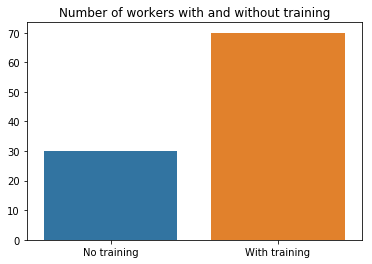

In [78]:
sns.barplot(x=['No training', 'With training'],y=[no_train.shape[0],yes_train.shape[0]])
plt.title('Number of workers with and without training')

Text(0.5,1,'Mean lnwage between workers with and without training')

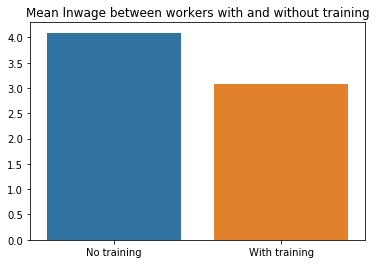

In [79]:
sns.barplot(x=['No training', 'With training'],y=[no_train['lnwage'].mean(),yes_train['lnwage'].mean()])
plt.title('Mean lnwage between workers with and without training')

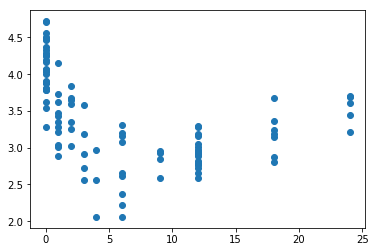

In [80]:
plt.scatter(x=data['training'],y=data['lnwage'])

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


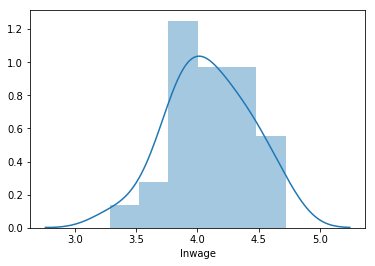

In [81]:
sns.distplot(no_train['lnwage'])

In [82]:
# answer (b) regression estimates

# Getting estimates of regression food_exp = a0 + a1*tot_exp + ui

Y = yes_train['lnwage']
X = yes_train['training']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.params

const       3.066803
training    0.001779
dtype: float64

Text(0.5,0,'number of months training')

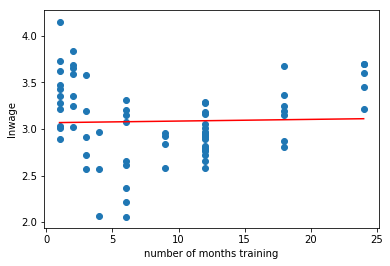

In [83]:
# answer (b) plotting

plt.scatter(x=yes_train['training'],y=yes_train['lnwage'])
plt.plot(X, X*0.0018 + 3.0668, 'r')
plt.ylabel('lnwage')
plt.xlabel('number of months training')

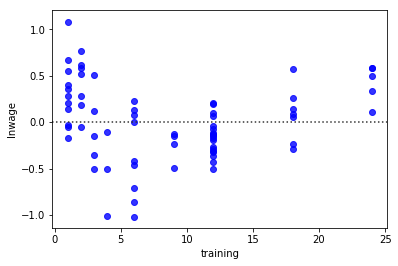

In [84]:
sns.residplot(yes_train['training'], yes_train['lnwage'], lowess=False, color="b")

In [85]:
# trying splines

first_5 = yes_train[yes_train['training']<=5]
after_5 = yes_train[yes_train['training']>5]

In [86]:
# getting estimates for first 5 years 

Y = first_5['lnwage']
X = first_5['training']
X = sm.add_constant(X)

model1 = sm.OLS(Y, X).fit()

print (model1.params)

# getting estimates for after 5 years 

Y_ = after_5['lnwage']
X_ = after_5['training']
X_ = sm.add_constant(X_)

model2 = sm.OLS(Y_, X_).fit()

print (model2.params)


const       3.738171
training   -0.250841
dtype: float64
const       2.439189
training    0.043083
dtype: float64


Text(0.5,0,'number of months training')

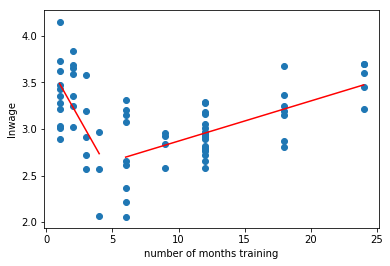

In [87]:
# spline (b) plotting

plt.scatter(x=yes_train['training'],y=yes_train['lnwage'])
plt.plot(X, X*-0.250841 + 3.738171, 'r')
plt.plot(X_, X_*0.043083 + 2.439189, 'r')
plt.ylabel('lnwage')
plt.xlabel('number of months training')


Text(0.5,1,'after 5 months')

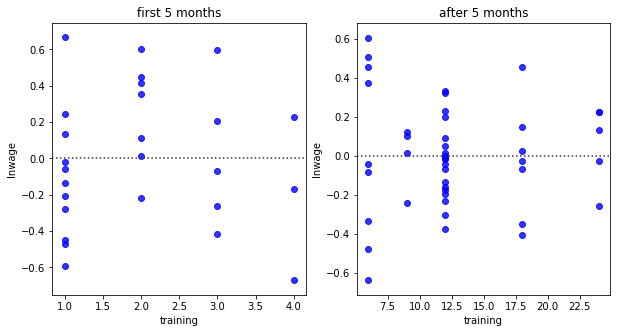

In [88]:
f, ax = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(10)
sns.residplot(first_5['training'], first_5['lnwage'], lowess=False, color="b",ax=ax[0])
ax[0].set_title('first 5 months')
sns.residplot(after_5['training'], after_5['lnwage'], lowess=False, color="b",ax=ax[1])
ax[1].set_title('after 5 months')

Text(0.5,0,'number of months training')

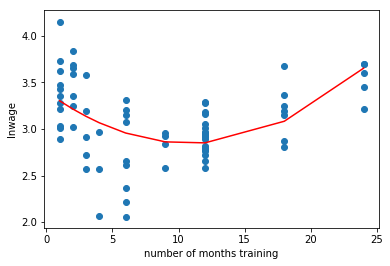

In [92]:
# polynomial regression degree 2

X = np.array(yes_train['training']).reshape(-1,1)
X_new = np.hstack([X,X**2])
Y = np.array(yes_train['lnwage']).reshape(-1,1)
model = LinearRegression()
model.fit(X_new,Y)

plt.scatter(x=yes_train['training'],y=yes_train['lnwage'])
plt.plot(X,model.predict(X_new),'r')
plt.ylabel('lnwage')
plt.xlabel('number of months training')

Text(0.5,0,'number of months training')

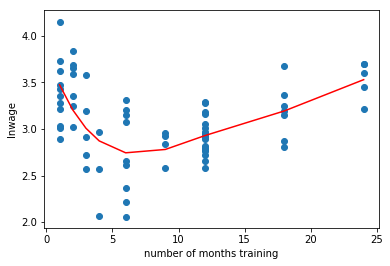

In [99]:
X = np.array(yes_train['training']).reshape(-1,1)
X_new = np.hstack([X,X**2,X**3,X**4])
Y = np.array(yes_train['lnwage']).reshape(-1,1)
model = LinearRegression()
model.fit(X_new,Y)

plt.scatter(x=yes_train['training'],y=yes_train['lnwage'])
plt.plot(X,model.predict(X_new),'r')
plt.ylabel('lnwage')
plt.xlabel('number of months training')